### Data information

#### Datasets
The datasets contain relative abundance profile and phenotypic information. 

* The rownames of profile are bacterial species and the colnames of profile are sampleID
* The `SubGroup` of phenotype is the short name of Group

#### Categories
Since the labels in the phenotypic data are discrete, the classification falls into three categories. 
* HC = Healthy Control
* AA = Adenoma
* CRC = Colorectal Cancer

In [128]:
import numpy as np
import pandas as pd 

#### Import Dataset

First, load the TSV and CSV file using read_table or read_csv function of Pandas, respectively

In [205]:
profile = pd.read_table("../../Result/Profile/species_profile.tsv", sep="\t")
phenotype = pd.read_csv("../../Result/Phenotype/phenotype.csv", index_col=0)

#### Inspect the datasets

In [130]:
profile.head()
# profile.tail()
# profile.describe()
# profile.info()
# profile.shape

,SID31004,SID31009,SID31021,SID31030,SID31071,SID31112,SID31129,SID31137,SID31159,SID31160,...,CCIS93040568ST_20_0,CCIS94417875ST_3_0,CCIS94496512ST_4_0,CCIS94603952ST_4_0,CCIS95097901ST_4_0,CCIS95409808ST_4_0,CCIS96387239ST_4_0,CCIS98482370ST_3_0,CCIS98512455ST_4_0,CCIS98832363ST_4_0
Faecalibacterium_prausnitzii,0.135886,0.051831,0.060921,0.027983,0.129658,0.004258,0.031940,0.011165,0.001472,0.123881,...,0.037214,0.051052,0.038784,0.094716,0.019845,0.015284,0.065977,0.039737,0.035087,0.077235
Streptococcus_salivarius,0.110076,0.001390,0.001750,0.001569,0.002624,0.002728,0.000618,0.001153,0.000705,0.001017,...,0.000401,0.001075,0.002450,0.001065,0.003687,0.002795,0.000652,0.000144,0.004168,0.000072
Anaerostipes_hadrus,0.082626,0.075518,0.082622,0.010753,0.030712,0.049991,0.012476,0.120778,0.004693,0.140610,...,0.000000,0.035204,0.031698,0.014717,0.049920,0.009625,0.000612,0.015524,0.007125,0.020083
Bacteroides_stercoris,0.052196,0.000000,0.000119,0.005979,0.000653,0.000000,0.000000,0.000000,0.001624,0.000000,...,0.000000,0.004150,0.001692,0.000000,0.000163,0.000489,0.009363,0.082417,0.046425,0.000000
Collinsella_aerofaciens,0.045848,0.036852,0.026752,0.021960,0.079479,0.196223,0.294001,0.000047,0.099181,0.045477,...,0.000000,0.004032,0.043769,0.000027,0.048369,0.017945,0.022356,0.000460,0.001963,0.033454


In [131]:
phenotype.head()

,study_name,study_condition,age,gender,country,BMI,SubGroup
SID31004,FengQ_2015,CRC,64,male,AUT,29.35,CRC
SID31009,FengQ_2015,control,68,male,AUT,32.00,HC
SID31021,FengQ_2015,control,60,female,AUT,22.10,HC
SID31030,FengQ_2015,adenoma,70,male,AUT,34.11,AA
SID31071,FengQ_2015,control,68,male,AUT,23.45,HC


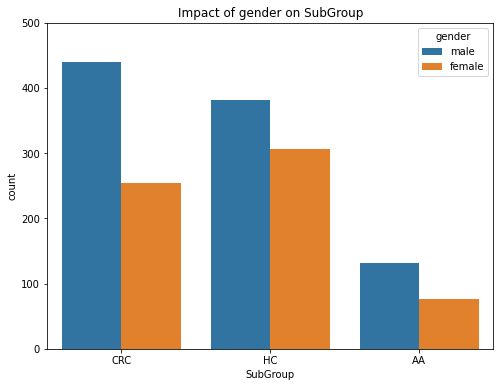

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='SubGroup', data=phenotype, hue='gender')
ax.set_ylim(0, 500)
plt.title("Impact of gender on SubGroup")
plt.show()

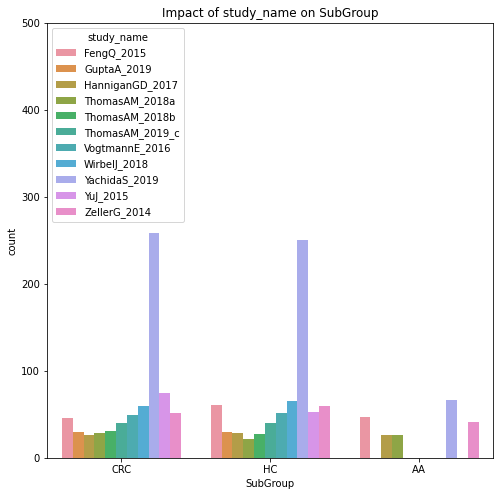

In [208]:
fig, ax=plt.subplots(figsize=(8,8))
sns.countplot(x='SubGroup', data=phenotype, hue='study_name')
ax.set_ylim(0, 500)
plt.title("Impact of study_name on SubGroup")
plt.show()

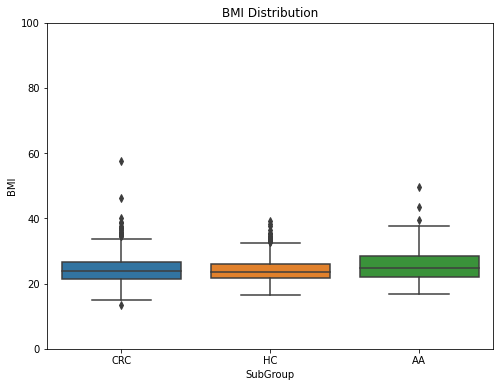

In [210]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='SubGroup', y='BMI', data=phenotype)
ax.set_ylim(0, 100)
plt.title("BMI Distribution")
plt.show()

In [132]:
# Review data types with *info()*
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Faecalibacterium_prausnitzii to Klebsiella_variicola
Columns: 1587 entries, SID31004 to CCIS98832363ST_4_0
dtypes: float64(1586), int64(1)
memory usage: 1.9+ MB


In [133]:
# Review number of columns of each data type in a DataFrame:
profile.dtypes.value_counts()

float64    1586
int64         1
dtype: int64

In [134]:
#check for missing variables
profile.isnull().any()

SID31004              False
SID31009              False
SID31021              False
SID31030              False
SID31071              False
                      ...  
CCIS95409808ST_4_0    False
CCIS96387239ST_4_0    False
CCIS98482370ST_3_0    False
CCIS98512455ST_4_0    False
CCIS98832363ST_4_0    False
Length: 1587, dtype: bool

### Integrate the *SubGroup* of Phenotype into Profile

The further analysis will be performed by using the integrated data with the group information. Before merging two dataset, the species with low occurrence would be dropped.

#### Filter the species with low occurrrence

In [175]:
prof = profile.loc[profile.apply(lambda x: len(x[x!=0])/len(x), axis=1) > 0.3, ]
prof = prof.T.rename_axis("SampleID").reset_index()
prof.head()

,SampleID,Faecalibacterium_prausnitzii,Streptococcus_salivarius,Anaerostipes_hadrus,Bacteroides_stercoris,Collinsella_aerofaciens,Bifidobacterium_longum,Bacteroides_plebeius,Bacteroides_vulgatus,Dorea_longicatena,...,Clostridium_bolteae,Anaerotruncus_colihominis,Bacteroides_caccae,Mogibacterium_diversum,Clostridium_symbiosum,Lachnospira_pectinoschiza,Prevotella_copri,Bacteroides_massiliensis,Phascolarctobacterium_faecium,Butyricimonas_synergistica
0,SID31004,0.135886,0.110076,0.082626,0.052196,0.045848,0.039128,0.037739,0.037588,0.037230,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,SID31009,0.051831,0.001390,0.075518,0.000000,0.036852,0.023695,0.000000,0.000078,0.044709,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,SID31021,0.060921,0.001750,0.082622,0.000119,0.026752,0.041738,0.000000,0.005641,0.012771,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,SID31030,0.027983,0.001569,0.010753,0.005979,0.021960,0.009776,0.000000,0.010840,0.014409,...,0.00003,0.000002,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,SID31071,0.129658,0.002624,0.030712,0.000653,0.079479,0.065415,0.000000,0.009723,0.052530,...,0.00000,0.000000,0.000089,0.000009,0.0,0.0,0.0,0.0,0.0,0.0


#### Select the group (HC & CRC) and sampleID of phenotype

In [171]:
phen = phenotype.iloc[:, phenotype.shape[1]-1].rename_axis("SampleID").reset_index()
phen_cln = phen[(phen["SubGroup"] == "HC") | (pheno["SubGroup"] == "CRC")]
phen_cln.head()

,SampleID,SubGroup
0,SID31004,CRC
1,SID31009,HC
2,SID31021,HC
4,SID31071,HC
5,SID31112,HC


#### Merge profile and phenotype

In [201]:
occurrence = 0.3
prof_cln = prof.loc[prof['SampleID'].isin(phen['SampleID'])]
prof_cln_v2 = prof_cln.set_index("SampleID").T
prof_cln_v3 = prof_cln_v2.loc[prof_cln_v2.apply(lambda x: sum(x!=0)/len(x), axis=1) > occurrence, ]
prof_cln_v4 = prof_cln_v3.T.rename_axis("SampleID").reset_index()
prof_cln_v4.shape

(1587, 111)

In [202]:
mdat = pd.merge(phen_cln, prof_cln_v4, on="SampleID", how="inner")
mdat.head()

,SampleID,SubGroup,Faecalibacterium_prausnitzii,Streptococcus_salivarius,Anaerostipes_hadrus,Bacteroides_stercoris,Collinsella_aerofaciens,Bifidobacterium_longum,Bacteroides_plebeius,Bacteroides_vulgatus,...,Clostridium_bolteae,Anaerotruncus_colihominis,Bacteroides_caccae,Mogibacterium_diversum,Clostridium_symbiosum,Lachnospira_pectinoschiza,Prevotella_copri,Bacteroides_massiliensis,Phascolarctobacterium_faecium,Butyricimonas_synergistica
0,SID31004,CRC,0.135886,0.110076,0.082626,0.052196,0.045848,0.039128,0.037739,0.037588,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,SID31009,HC,0.051831,0.001390,0.075518,0.000000,0.036852,0.023695,0.000000,0.000078,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,SID31021,HC,0.060921,0.001750,0.082622,0.000119,0.026752,0.041738,0.000000,0.005641,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,SID31071,HC,0.129658,0.002624,0.030712,0.000653,0.079479,0.065415,0.000000,0.009723,...,0.000000,0.0,0.000089,0.000009,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,SID31112,HC,0.004258,0.002728,0.049991,0.000000,0.196223,0.000000,0.000000,0.003655,...,0.000021,0.0,0.002170,0.000088,0.000312,0.000097,0.000093,0.000081,0.0,0.0


In [203]:
mdat_final = mdat.rename(columns={"SubGroup": "Group"})
mdat_final.shape

(1380, 112)

In [204]:
mdat_final.to_csv("../../Result/Profile/CRC_HC_species.csv")